In [2]:
# importing dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

In [122]:
def costFunction_Reg(X, y, Theta, Lambda):
    m = y.size
    
    grad = np.zeros_like(Theta)
    h = X @ Theta
    J = ( 1/(2*m) ) * np.sum((h-y)**2) + (Lambda/(2*m)) * np.sum(Theta[1:]**2)
    
    grad = (1/m) * X.T @ (h-y)
    grad[1:] = grad[1:] + (Lambda/m)*Theta[1:]
    
    return J, grad

In [216]:
# Batch Gradient Descent
def batchGradDescent(X,y,Lambda):
    iteration = 1

    m,n = X.shape
    Theta = np.zeros((n,1))
    alpha = 0.001
    Jhist = []
    tolerance = 1e-6

    while True:

        J, grad = costFunction_Reg(X,y,Theta,Lambda)
        Theta = Theta - alpha * grad

        if iteration%100 == 0:
            print('Iteration #{} - {}'.format(iteration, J))

        if iteration!=1 and abs(Jhist[-1]-J) <= tolerance:
            print('Iteration #{} - {}'.format(iteration-1, Jhist[-1]))
            print('Iteration #{} - {}'.format(iteration, J))
            print('Converged!!')
            break

        Jhist.append(J)
        iteration+=1
        
    return Theta, Jhist

# Testing with single Feature

In [196]:
data = sio.loadmat('../dataRegr.mat')

X = data['X']
y = data['y']

Xval = data['Xval']
yval = data['yval']

Xtest = data['Xtest']
ytest = data['ytest']

X = np.hstack((np.ones_like(X), X))
Xtest = np.hstack((np.ones_like(Xtest), Xtest))
Xval = np.hstack((np.ones_like(Xval), Xval))

m,n = X.shape


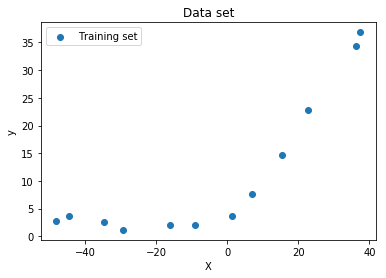

In [144]:
plt.scatter(X[:,1],y,label = 'Training set')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Data set')
plt.legend(loc= 'best')

plt.show()

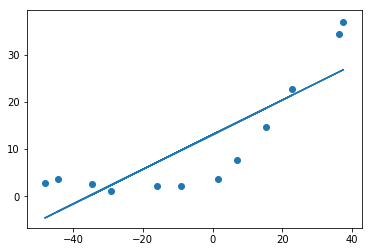

In [202]:
# For single feature: 
plt.plot(X[:,1], X@Theta)
plt.scatter(X[:,1],y)
plt.show()

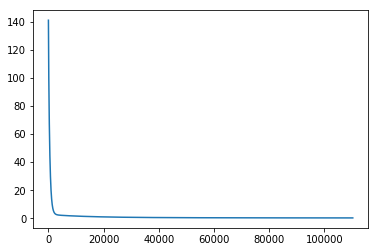

In [218]:
Theta, Jhist = batchGradDescent(X,y, 0)

plt.plot(range(len(Jhist)), Jhist)
plt.show()

# End

# Polynomial Feature creation:

In [239]:
def mean_Normalization(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X = (X-mu)/sigma
    return X

In [240]:
data = sio.loadmat('../dataRegr.mat')

# Creating polynomial features

X = data['X']
y = data['y']

Xval = data['Xval']
yval = data['yval']

Xtest = data['Xtest']
ytest = data['ytest']

d = np.arange(10)      # Degree of polynomial

X = np.hstack((X**i for i in d))
Xtest = np.hstack((Xtest**i for i in d))
Xval = np.hstack((Xval**i for i in d))

# Normalizing features

X[:,1:] = mean_Normalization(X[:,1:])
Xtest[:,1:] = mean_Normalization(Xtest[:,1:])
Xval[:,1:] = mean_Normalization(Xval[:,1:])



# Hyperparameter tuning:
## Estimating degree:



Degree ::1...
Training...

Iteration #100 - 119.6439029239404
Iteration #200 - 102.00387521496289
Iteration #300 - 87.56288717903773
Iteration #400 - 75.7407892269126
Iteration #500 - 66.06264257642361
Iteration #600 - 58.13963914947824
Iteration #700 - 51.65348166805413
Iteration #800 - 46.34359643807224
Iteration #900 - 41.99666510988166
Iteration #1000 - 38.43805486623446
Iteration #1100 - 35.52480275570195
Iteration #1200 - 33.1398723254384
Iteration #1300 - 31.187451820315122
Iteration #1400 - 29.589105059145883
Iteration #1500 - 28.280620354013724
Iteration #1600 - 27.209430881766554
Iteration #1700 - 26.332502874161584
Iteration #1800 - 25.614606787198724
Iteration #1900 - 25.02690199591931
Iteration #2000 - 24.54577815645944
Iteration #2100 - 24.151906688451337
Iteration #2200 - 23.829464272201477
Iteration #2300 - 23.56549716556426
Iteration #2400 - 23.34940080269485
Iteration #2500 - 23.172493768177212
Iteration #2600 - 23.02766903144282
Iteration #2700 - 22.90910843023565


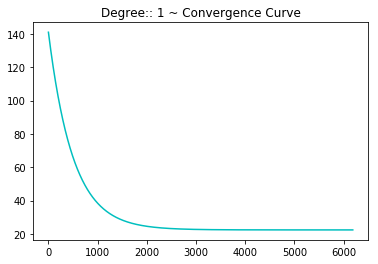



Degree ::2...
Training...

Iteration #100 - 119.1915207798157
Iteration #200 - 100.89650702678608
Iteration #300 - 85.6432230256012
Iteration #400 - 72.89157245608125
Iteration #500 - 62.20296353007266
Iteration #600 - 53.22030815537338
Iteration #700 - 45.65211901599889
Iteration #800 - 39.25983735118693
Iteration #900 - 33.847712761541224
Iteration #1000 - 29.25470298869317
Iteration #1100 - 25.347975805030163
Iteration #1200 - 22.017684226594483
Iteration #1300 - 19.172755862697493
Iteration #1400 - 16.737491690408643
Iteration #1500 - 14.648812251964436
Iteration #1600 - 12.854022818467095
Iteration #1700 - 11.308995458194255
Iteration #1800 - 9.976686754843158
Iteration #1900 - 8.825926353810859
Iteration #2000 - 7.830424517412924
Iteration #2100 - 6.9679571784908285
Iteration #2200 - 6.219695170298196
Iteration #2300 - 5.569650827675433
Iteration #2400 - 5.004220351687804
Iteration #2500 - 4.51180448268344
Iteration #2600 - 4.08249335161025
Iteration #2700 - 3.707804046791328
I

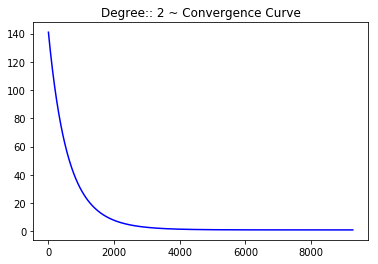



Degree ::3...
Training...

Iteration #100 - 113.55103924493973
Iteration #200 - 92.37276028876428
Iteration #300 - 75.91310163454496
Iteration #400 - 62.92240634887225
Iteration #500 - 52.53072977272524
Iteration #600 - 44.121885563157726
Iteration #700 - 37.25134372281897
Iteration #800 - 31.592330983651355
Iteration #900 - 26.90013747093211
Iteration #1000 - 22.988232524140393
Iteration #1100 - 19.712085749592234
Iteration #1200 - 16.958052354659863
Iteration #1300 - 14.635616596949628
Iteration #1400 - 12.671885667182103
Iteration #1500 - 11.00761047576312
Iteration #1600 - 9.594257186791777
Iteration #1700 - 8.39181328898036
Iteration #1800 - 7.367115937553853
Iteration #1900 - 6.492558279104415
Iteration #2000 - 5.745074271676085
Iteration #2100 - 5.1053323131126636
Iteration #2200 - 4.557088032953567
Iteration #2300 - 4.086660255102034
Iteration #2400 - 3.6825035723622834
Iteration #2500 - 3.3348575968989147
Iteration #2600 - 3.03545767927856
Iteration #2700 - 2.777295324076419

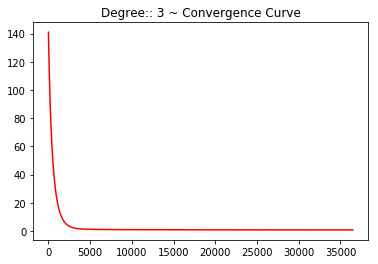



Degree ::4...
Training...

Iteration #100 - 113.51638805347905
Iteration #200 - 92.15702455288164
Iteration #300 - 75.37415229703187
Iteration #400 - 61.9834961215214
Iteration #500 - 51.18167550569161
Iteration #600 - 42.40108069564465
Iteration #700 - 35.22558448540662
Iteration #800 - 29.340438839165955
Iteration #900 - 24.501597439241237
Iteration #1000 - 20.51625164081662
Iteration #1100 - 17.229978025643128
Iteration #1200 - 14.517892983135228
Iteration #1300 - 12.278319191302057
Iteration #1400 - 10.428088985097904
Iteration #1500 - 8.89895932477725
Iteration #1600 - 7.6348128305084915
Iteration #1700 - 6.589435463249362
Iteration #1800 - 5.724730525513587
Iteration #1900 - 5.0092710130998075
Iteration #2000 - 4.417119260427166
Iteration #2100 - 3.9268606169730242
Iteration #2200 - 3.5208101547912016
Iteration #2300 - 3.1843601964256267
Iteration #2400 - 2.9054429751293265
Iteration #2500 - 2.6740877203261926
Iteration #2600 - 2.4820553508034937
Iteration #2700 - 2.32253704622

Iteration #22300 - 1.001031851149449
Iteration #22400 - 0.9989171726042543
Iteration #22500 - 0.9968090023369005
Iteration #22600 - 0.9947073189708964
Iteration #22700 - 0.992612101218871
Iteration #22800 - 0.9905233278819583
Iteration #22900 - 0.9884409778491815
Iteration #23000 - 0.9863650300968484
Iteration #23100 - 0.9842954636879544
Iteration #23200 - 0.9822322577715734
Iteration #23300 - 0.9801753915823014
Iteration #23400 - 0.9781248444396389
Iteration #23500 - 0.9760805957474421
Iteration #23600 - 0.9740426249933523
Iteration #23700 - 0.9720109117482192
Iteration #23800 - 0.9699854356655637
Iteration #23900 - 0.9679661764810228
Iteration #24000 - 0.9659531140117945
Iteration #24100 - 0.9639462281561159
Iteration #24200 - 0.9619454988927223
Iteration #24300 - 0.9599509062803239
Iteration #24400 - 0.9579624304570846
Iteration #24500 - 0.9559800516401086
Iteration #24600 - 0.9540037501249228
Iteration #24700 - 0.952033506284988
Iteration #24800 - 0.9500693005711895
Iteration #2490

Iteration #44500 - 0.659638320152035
Iteration #44600 - 0.65856302457061
Iteration #44700 - 0.6574909823493158
Iteration #44800 - 0.6564221835898474
Iteration #44900 - 0.6553566184248089
Iteration #45000 - 0.6542942770175997
Iteration #45100 - 0.6532351495623034
Iteration #45200 - 0.6521792262835856
Iteration #45300 - 0.6511264974365907
Iteration #45400 - 0.6500769533068294
Iteration #45500 - 0.6490305842100785
Iteration #45600 - 0.6479873804922742
Iteration #45700 - 0.6469473325294112
Iteration #45800 - 0.645910430727435
Iteration #45900 - 0.64487666552214
Iteration #46000 - 0.6438460273790687
Iteration #46100 - 0.6428185067934067
Iteration #46200 - 0.6417940942898864
Iteration #46300 - 0.6407727804226797
Iteration #46400 - 0.639754555775297
Iteration #46500 - 0.6387394109604981
Iteration #46600 - 0.637727336620177
Iteration #46700 - 0.6367183234252721
Iteration #46800 - 0.6357123620756707
Iteration #46900 - 0.6347094433000942
Iteration #47000 - 0.6337095578560226
Iteration #47100 - 0

Iteration #66600 - 0.48612250250320754
Iteration #66700 - 0.48557172690521766
Iteration #66800 - 0.485022615407675
Iteration #66900 - 0.48447516298043075
Iteration #67000 - 0.4839293646085685
Iteration #67100 - 0.48338521529236367
Iteration #67200 - 0.4828427100472368
Iteration #67300 - 0.4823018439037067
Iteration #67400 - 0.4817626119073455
Iteration #67500 - 0.4812250091187279
Iteration #67600 - 0.4806890306133895
Iteration #67700 - 0.4801546714817826
Iteration #67800 - 0.47962192682922467
Iteration #67900 - 0.47909079177585967
Iteration #68000 - 0.47856126145660616
Iteration #68100 - 0.47803333102111695
Iteration #68200 - 0.477506995633735
Iteration #68300 - 0.47698225047344156
Iteration #68400 - 0.4764590907338194
Iteration #68500 - 0.4759375116230028
Iteration #68600 - 0.47541750836363605
Iteration #68700 - 0.47489907619282806
Iteration #68800 - 0.47438221036210826
Iteration #68900 - 0.47386690613738436
Iteration #69000 - 0.47335315879889467
Iteration #69100 - 0.4728409636411653


Iteration #88600 - 0.3975100593734777
Iteration #88700 - 0.39722699637399594
Iteration #88800 - 0.3969447885191826
Iteration #88900 - 0.3966634332255155
Iteration #89000 - 0.396382927917279
Iteration #89100 - 0.39610327002654144
Iteration #89200 - 0.39582445699313
Iteration #89300 - 0.39554648626460615
Iteration #89400 - 0.3952693552962473
Iteration #89500 - 0.3949930615510171
Iteration #89600 - 0.39471760249954724
Iteration #89700 - 0.39444297562011144
Iteration #89800 - 0.3941691783986031
Iteration #89900 - 0.3938962083285116
Iteration #90000 - 0.3936240629109012
Iteration #90100 - 0.3933527396543875
Iteration #90200 - 0.3930822360751119
Iteration #90300 - 0.39281254969672236
Iteration #90400 - 0.39254367805034895
Iteration #90500 - 0.3922756186745825
Iteration #90600 - 0.39200836911545
Iteration #90700 - 0.39174192692639337
Iteration #90800 - 0.39147628966824893
Iteration #90900 - 0.39121145490921855
Iteration #91000 - 0.39094742022485734
Iteration #91100 - 0.3906841831980421
Iterat

Iteration #109700 - 0.35329752694819583
Iteration #109800 - 0.3531480310228586
Iteration #109900 - 0.3529989867266392
Iteration #110000 - 0.3528503926951584
Iteration #110100 - 0.35270224756815366
Iteration #110200 - 0.3525545499894742
Iteration #110300 - 0.35240729860706793
Iteration #110400 - 0.35226049207296645
Iteration #110500 - 0.3521141290432702
Iteration #110600 - 0.3519682081781446
Iteration #110700 - 0.3518227281418006
Iteration #110800 - 0.3516776876024843
Iteration #110900 - 0.3515330852324674
Iteration #111000 - 0.3513889197080293
Iteration #111100 - 0.35124518970944996
Iteration #111200 - 0.35110189392099606
Iteration #111300 - 0.35095903103091086
Iteration #111400 - 0.35081659973139967
Iteration #111500 - 0.3506745987186171
Iteration #111600 - 0.3505330266926581
Iteration #111700 - 0.3503918823575443
Iteration #111800 - 0.3502511644212141
Iteration #111900 - 0.3501108715955075
Iteration #112000 - 0.3499710025961551
Iteration #112100 - 0.34983155614277106
Iteration #11220

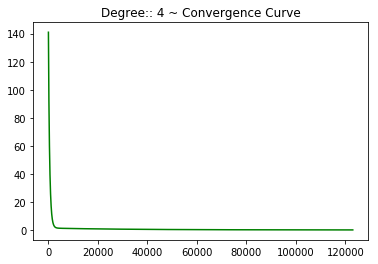



Degree ::5...
Training...

Iteration #100 - 110.72172597591651
Iteration #200 - 88.78776762287796
Iteration #300 - 72.22154416770988
Iteration #400 - 59.266070840868906
Iteration #500 - 48.9129191579773
Iteration #600 - 40.53236416647507
Iteration #700 - 33.69777327227885
Iteration #800 - 28.09998251751364
Iteration #900 - 23.50377295724671
Iteration #1000 - 19.72437707360355
Iteration #1100 - 16.613783252348014
Iteration #1200 - 14.052045315608662
Iteration #1300 - 11.94131188701794
Iteration #1400 - 10.201453903728323
Iteration #1500 - 8.766714357239486
Iteration #1600 - 7.583065140051269
Iteration #1700 - 6.606084343333242
Iteration #1800 - 5.799233662495105
Iteration #1900 - 5.132452107757056
Iteration #2000 - 4.581004036536266
Iteration #2100 - 4.124533703939504
Iteration #2200 - 3.746288466570733
Iteration #2300 - 3.4324801607902495
Iteration #2400 - 3.1717598903919275
Iteration #2500 - 2.9547859929363818
Iteration #2600 - 2.773868607670892
Iteration #2700 - 2.6226772384244397


Iteration #22300 - 1.0333667822410748
Iteration #22400 - 1.0311518364545216
Iteration #22500 - 1.0289447395162763
Iteration #22600 - 1.0267454349249692
Iteration #22700 - 1.0245538672089718
Iteration #22800 - 1.0223699819008074
Iteration #22900 - 1.020193725512191
Iteration #23000 - 1.0180250455097757
Iteration #23100 - 1.0158638902914743
Iteration #23200 - 1.0137102091634242
Iteration #23300 - 1.01156395231756
Iteration #23400 - 1.0094250708097272
Iteration #23500 - 1.007293516538436
Iteration #23600 - 1.00516924222409
Iteration #23700 - 1.003052201388799
Iteration #23800 - 1.0009423483367212
Iteration #23900 - 0.9988396381348841
Iteration #24000 - 0.9967440265945325
Iteration #24100 - 0.9946554702529495
Iteration #24200 - 0.9925739263557444
Iteration #24300 - 0.99049935283961
Iteration #24400 - 0.9884317083155265
Iteration #24500 - 0.9863709520523842
Iteration #24600 - 0.9843170439610713
Iteration #24700 - 0.9822699445789207
Iteration #24800 - 0.9802296150546044
Iteration #24900 - 0.

Iteration #44500 - 0.6795614340429494
Iteration #44600 - 0.6784423625285454
Iteration #44700 - 0.6773265844991454
Iteration #44800 - 0.6762140899379498
Iteration #44900 - 0.6751048688608062
Iteration #45000 - 0.6739989113160446
Iteration #45100 - 0.6728962073843184
Iteration #45200 - 0.6717967471784438
Iteration #45300 - 0.6707005208432517
Iteration #45400 - 0.6696075185554361
Iteration #45500 - 0.6685177305233874
Iteration #45600 - 0.6674311469870668
Iteration #45700 - 0.6663477582178425
Iteration #45800 - 0.6652675545183528
Iteration #45900 - 0.6641905262223526
Iteration #46000 - 0.6631166636945887
Iteration #46100 - 0.6620459573306385
Iteration #46200 - 0.6609783975567913
Iteration #46300 - 0.6599139748298963
Iteration #46400 - 0.6588526796372367
Iteration #46500 - 0.6577945024963938
Iteration #46600 - 0.6567394339551083
Iteration #46700 - 0.655687464591162
Iteration #46800 - 0.6546385850122343
Iteration #46900 - 0.6535927858557873
Iteration #47000 - 0.6525500577889273
Iteration #47

Iteration #66300 - 0.4989770575493813
Iteration #66400 - 0.49838445481278165
Iteration #66500 - 0.4977935568445751
Iteration #66600 - 0.49720435851827516
Iteration #66700 - 0.4966168547228832
Iteration #66800 - 0.4960310403628523
Iteration #66900 - 0.49544691035802774
Iteration #67000 - 0.49486445964361453
Iteration #67100 - 0.4942836831701203
Iteration #67200 - 0.493704575903313
Iteration #67300 - 0.49312713282417064
Iteration #67400 - 0.4925513489288442
Iteration #67500 - 0.4919772192285999
Iteration #67600 - 0.4914047387497833
Iteration #67700 - 0.49083390253376563
Iteration #67800 - 0.4902647056369084
Iteration #67900 - 0.48969714313050483
Iteration #68000 - 0.4891312101007451
Iteration #68100 - 0.48856690164866806
Iteration #68200 - 0.48800421289011037
Iteration #68300 - 0.4874431389556726
Iteration #68400 - 0.4868836749906691
Iteration #68500 - 0.48632581615507997
Iteration #68600 - 0.4857695576235066
Iteration #68700 - 0.48521489458514155
Iteration #68800 - 0.48466182224370213
I

Iteration #87900 - 0.40327641314107426
Iteration #88000 - 0.40295500682806107
Iteration #88100 - 0.40263449109479243
Iteration #88200 - 0.40231486327411736
Iteration #88300 - 0.40199612070693425
Iteration #88400 - 0.4016782607421692
Iteration #88500 - 0.4013612807367585
Iteration #88600 - 0.4010451780556162
Iteration #88700 - 0.40072995007161155
Iteration #88800 - 0.4004155941655495
Iteration #88900 - 0.4001021077261416
Iteration #89000 - 0.39978948814998283
Iteration #89100 - 0.3994777328415313
Iteration #89200 - 0.3991668392130839
Iteration #89300 - 0.39885680468474594
Iteration #89400 - 0.3985476266844148
Iteration #89500 - 0.39823930264775714
Iteration #89600 - 0.3979318300181796
Iteration #89700 - 0.39762520624680536
Iteration #89800 - 0.3973194287924596
Iteration #89900 - 0.39701449512163667
Iteration #90000 - 0.39671040270848146
Iteration #90100 - 0.39640714903476604
Iteration #90200 - 0.3961047315898627
Iteration #90300 - 0.39580314787072746
Iteration #90400 - 0.395502395381875

Iteration #109100 - 0.35146513900640125
Iteration #109200 - 0.3512837262094889
Iteration #109300 - 0.35110278590963084
Iteration #109400 - 0.35092231670171997
Iteration #109500 - 0.35074231718488935
Iteration #109600 - 0.35056278596249674
Iteration #109700 - 0.35038372164211556
Iteration #109800 - 0.35020512283551924
Iteration #109900 - 0.35002698815867156
Iteration #110000 - 0.349849316231714
Iteration #110100 - 0.34967210567894547
Iteration #110200 - 0.3494953551288223
Iteration #110300 - 0.3493190632139332
Iteration #110400 - 0.34914322857099667
Iteration #110500 - 0.3489678498408457
Iteration #110600 - 0.34879292566841
Iteration #110700 - 0.3486184547027107
Iteration #110800 - 0.3484444355968431
Iteration #110900 - 0.34827086700796667
Iteration #111000 - 0.34809774759729495
Iteration #111100 - 0.3479250760300773
Iteration #111200 - 0.3477528509755921
Iteration #111300 - 0.34758107110713254
Iteration #111400 - 0.3474097351019956
Iteration #111500 - 0.3472388416414652
Iteration #1116

Iteration #130200 - 0.3217882405782072
Iteration #130300 - 0.32168102648038693
Iteration #130400 - 0.3215740653142376
Iteration #130500 - 0.32146735633682516
Iteration #130600 - 0.32136089880745244
Iteration #130700 - 0.32125469198765366
Iteration #130800 - 0.32114873514118947
Iteration #130900 - 0.32104302753403985
Iteration #131000 - 0.3209375684343939
Iteration #131100 - 0.3208323571126503
Iteration #131200 - 0.3207273928414014
Iteration #131300 - 0.32062267489543556
Iteration #131400 - 0.3205182025517248
Iteration #131500 - 0.320413975089419
Iteration #131600 - 0.32030999178984115
Iteration #131700 - 0.3202062519364797
Iteration #131800 - 0.3201027548149829
Iteration #131900 - 0.31999949971314945
Iteration #132000 - 0.31989648592092707
Iteration #132100 - 0.3197937127303993
Iteration #132200 - 0.31969117943578557
Iteration #132300 - 0.31958888533343066
Iteration #132400 - 0.31948682972180126
Iteration #132500 - 0.3193850119014747
Iteration #132600 - 0.31928343117513786
Iteration #1

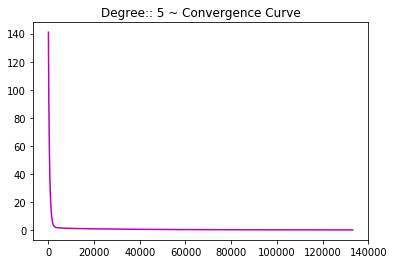



Degree ::6...
Training...

Iteration #100 - 110.75665648796834
Iteration #200 - 88.82253245687721
Iteration #300 - 72.09486826356583
Iteration #400 - 58.90588266760791
Iteration #500 - 48.3289804424068
Iteration #600 - 39.77567065755204
Iteration #700 - 32.830618610286415
Iteration #800 - 27.180172605359918
Iteration #900 - 22.5783509157439
Iteration #1000 - 18.82845439234937
Iteration #1100 - 15.771676628161192
Iteration #1200 - 13.279208173956878
Iteration #1300 - 11.246337611244208
Iteration #1400 - 9.587852122059596
Iteration #1500 - 8.234370542727369
Iteration #1600 - 7.129387356283168
Iteration #1700 - 6.226876983222729
Iteration #1800 - 5.4893471647522505
Iteration #1900 - 4.886255297695998
Iteration #2000 - 4.392719277148762
Iteration #2100 - 3.988467768214301
Iteration #2200 - 3.6569853084719055
Iteration #2300 - 3.3848160213507414
Iteration #2400 - 3.1609964830693915
Iteration #2500 - 2.9765937691612594
Iteration #2600 - 2.824329162653741
Iteration #2700 - 2.698271631023009

Iteration #22800 - 0.9778671699900121
Iteration #22900 - 0.9746107443539536
Iteration #23000 - 0.9713713227625084
Iteration #23100 - 0.968148813184056
Iteration #23200 - 0.9649431241416189
Iteration #23300 - 0.9617541647078053
Iteration #23400 - 0.9585818444998471
Iteration #23500 - 0.9554260736747022
Iteration #23600 - 0.9522867629242968
Iteration #23700 - 0.9491638234707951
Iteration #23800 - 0.9460571670619929
Iteration #23900 - 0.9429667059667803
Iteration #24000 - 0.9398923529706794
Iteration #24100 - 0.9368340213714706
Iteration #24200 - 0.9337916249748731
Iteration #24300 - 0.930765078090333
Iteration #24400 - 0.9277542955268325
Iteration #24500 - 0.9247591925888249
Iteration #24600 - 0.9217796850721875
Iteration #24700 - 0.9188156892602748
Iteration #24800 - 0.9158671219200152
Iteration #24900 - 0.912933900298075
Iteration #25000 - 0.9100159421170907
Iteration #25100 - 0.9071131655719462
Iteration #25200 - 0.9042254893261177
Iteration #25300 - 0.9013528325080704
Iteration #2540

Iteration #44500 - 0.5525411767818935
Iteration #44600 - 0.5514756327946517
Iteration #44700 - 0.5504154524475626
Iteration #44800 - 0.5493606074522633
Iteration #44900 - 0.5483110696701227
Iteration #45000 - 0.5472668111114448
Iteration #45100 - 0.5462278039346922
Iteration #45200 - 0.5451940204456773
Iteration #45300 - 0.5441654330968031
Iteration #45400 - 0.5431420144862705
Iteration #45500 - 0.5421237373573133
Iteration #45600 - 0.541110574597425
Iteration #45700 - 0.5401024992375925
Iteration #45800 - 0.5390994844515419
Iteration #45900 - 0.5381015035549739
Iteration #46000 - 0.5371085300048135
Iteration #46100 - 0.5361205373984614
Iteration #46200 - 0.5351374994730552
Iteration #46300 - 0.5341593901047197
Iteration #46400 - 0.5331861833078284
Iteration #46500 - 0.5322178532342794
Iteration #46600 - 0.531254374172768
Iteration #46700 - 0.5302957205480447
Iteration #46800 - 0.529341866920215
Iteration #46900 - 0.52839278798401
Iteration #47000 - 0.5274484585680722
Iteration #47100 

Iteration #66400 - 0.4096741262954797
Iteration #66500 - 0.40930663217339247
Iteration #66600 - 0.40894082821680816
Iteration #66700 - 0.40857670557208936
Iteration #66800 - 0.40821425543242484
Iteration #66900 - 0.4078534690375708
Iteration #67000 - 0.4074943376736112
Iteration #67100 - 0.407136852672714
Iteration #67200 - 0.4067810054128872
Iteration #67300 - 0.40642678731772347
Iteration #67400 - 0.4060741898561856
Iteration #67500 - 0.405723204542333
Iteration #67600 - 0.4053738229351126
Iteration #67700 - 0.40502603663810444
Iteration #67800 - 0.4046798372992907
Iteration #67900 - 0.4043352166108207
Iteration #68000 - 0.4039921663087743
Iteration #68100 - 0.40365067817293276
Iteration #68200 - 0.4033107440265492
Iteration #68300 - 0.4029723557361111
Iteration #68400 - 0.4026355052111176
Iteration #68500 - 0.4023001844038553
Iteration #68600 - 0.4019663853091596
Iteration #68700 - 0.40163409996420185
Iteration #68800 - 0.4013033204482598
Iteration #68900 - 0.4009740388824916
Iterat

Iteration #87900 - 0.35837648137390554
Iteration #88000 - 0.3582277474161093
Iteration #88100 - 0.35807956472040925
Iteration #88200 - 0.35793193045351235
Iteration #88300 - 0.3577848417970917
Iteration #88400 - 0.35763829594770297
Iteration #88500 - 0.3574922901167079
Iteration #88600 - 0.3573468215301952
Iteration #88700 - 0.35720188742890635
Iteration #88800 - 0.35705748506815105
Iteration #88900 - 0.3569136117177334
Iteration #89000 - 0.3567702646618782
Iteration #89100 - 0.3566274411991516
Iteration #89200 - 0.35648513864238446
Iteration #89300 - 0.35634335431859976
Iteration #89400 - 0.3562020855689321
Iteration #89500 - 0.3560613297485642
Iteration #89600 - 0.35592108422663543
Iteration #89700 - 0.35578134638618575
Iteration #89800 - 0.35564211362407105
Iteration #89900 - 0.35550338335089315
Iteration #90000 - 0.35536515299092664
Iteration #90100 - 0.355227419982045
Iteration #90200 - 0.35509018177565643
Iteration #90300 - 0.35495343583662076
Iteration #90400 - 0.354817179643186

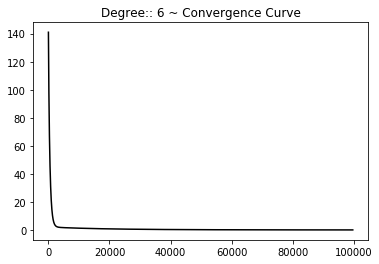



Degree ::7...
Training...

Iteration #100 - 109.43298843370565
Iteration #200 - 87.61942424595111
Iteration #300 - 71.19347230872312
Iteration #400 - 58.24609941350583
Iteration #500 - 47.840383712975225
Iteration #600 - 39.410700264329776
Iteration #700 - 32.559612654839825
Iteration #800 - 26.983791033334203
Iteration #900 - 22.44283055892251
Iteration #1000 - 18.743166383273003
Iteration #1100 - 15.727950692566846
Iteration #1200 - 13.269763380745502
Iteration #1300 - 11.264984254853797
Iteration #1400 - 9.629311378076757
Iteration #1500 - 8.294146111562227
Iteration #1600 - 7.203662183260606
Iteration #1700 - 6.312424452901486
Iteration #1800 - 5.583452667497405
Iteration #1900 - 4.986646501697637
Iteration #2000 - 4.4975042676470816
Iteration #2100 - 4.096080448695002
Iteration #2200 - 3.766137495240683
Iteration #2300 - 3.4944556521611574
Iteration #2400 - 3.270271352405281
Iteration #2500 - 3.0848202100535937
Iteration #2600 - 2.9309651172724327
Iteration #2700 - 2.80289358580

Iteration #22500 - 1.0003045449375887
Iteration #22600 - 0.9969921103101959
Iteration #22700 - 0.9936967563222426
Iteration #22800 - 0.9904183905758657
Iteration #22900 - 0.9871569212545236
Iteration #23000 - 0.9839122571160616
Iteration #23100 - 0.9806843074859981
Iteration #23200 - 0.9774729822510096
Iteration #23300 - 0.9742781918525579
Iteration #23400 - 0.9710998472807401
Iteration #23500 - 0.9679378600682724
Iteration #23600 - 0.9647921422846537
Iteration #23700 - 0.9616626065304785
Iteration #23800 - 0.9585491659318903
Iteration #23900 - 0.9554517341351999
Iteration #24000 - 0.9523702253016212
Iteration #24100 - 0.9493045541021546
Iteration #24200 - 0.9462546357125842
Iteration #24300 - 0.9432203858086112
Iteration #24400 - 0.9402017205610926
Iteration #24500 - 0.9371985566314072
Iteration #24600 - 0.9342108111669112
Iteration #24700 - 0.9312384017965247
Iteration #24800 - 0.928281246626395
Iteration #24900 - 0.9253392642356766
Iteration #25000 - 0.9224123736723856
Iteration #25

Iteration #44400 - 0.5621937267282673
Iteration #44500 - 0.5610966394008037
Iteration #44600 - 0.560004909363877
Iteration #44700 - 0.5589185085429388
Iteration #44800 - 0.5578374090121537
Iteration #44900 - 0.5567615829936228
Iteration #45000 - 0.5556910028565867
Iteration #45100 - 0.5546256411166468
Iteration #45200 - 0.5535654704349896
Iteration #45300 - 0.5525104636176161
Iteration #45400 - 0.5514605936145728
Iteration #45500 - 0.5504158335191822
Iteration #45600 - 0.5493761565672899
Iteration #45700 - 0.5483415361364979
Iteration #45800 - 0.5473119457454307
Iteration #45900 - 0.5462873590529621
Iteration #46000 - 0.5452677498574862
Iteration #46100 - 0.5442530920961827
Iteration #46200 - 0.5432433598442645
Iteration #46300 - 0.5422385273142547
Iteration #46400 - 0.5412385688552593
Iteration #46500 - 0.540243458952234
Iteration #46600 - 0.5392531722252709
Iteration #46700 - 0.5382676834288813
Iteration #46800 - 0.5372869674512779
Iteration #46900 - 0.5363109993136654
Iteration #470

Iteration #66000 - 0.413757338380629
Iteration #66100 - 0.4133554084544817
Iteration #66200 - 0.41295521747609765
Iteration #66300 - 0.41255675651751966
Iteration #66400 - 0.41216001669792135
Iteration #66500 - 0.41176498918338045
Iteration #66600 - 0.41137166518660584
Iteration #66700 - 0.4109800359667127
Iteration #66800 - 0.41059009282895925
Iteration #66900 - 0.4102018271245127
Iteration #67000 - 0.40981523025019595
Iteration #67100 - 0.4094302936482619
Iteration #67200 - 0.4090470088061301
Iteration #67300 - 0.4086653672561672
Iteration #67400 - 0.40828536057543785
Iteration #67500 - 0.4079069803854696
Iteration #67600 - 0.40753021835201825
Iteration #67700 - 0.40715506618483754
Iteration #67800 - 0.4067815156374331
Iteration #67900 - 0.40640955850684507
Iteration #68000 - 0.406039186633406
Iteration #68100 - 0.4056703919005241
Iteration #68200 - 0.4053031662344352
Iteration #68300 - 0.4049375016039942
Iteration #68400 - 0.40457339002044446
Iteration #68500 - 0.4042108235371855
It

Iteration #87600 - 0.35590408477504704
Iteration #87700 - 0.35573065865839804
Iteration #87800 - 0.3555578185067566
Iteration #87900 - 0.3553855614635515
Iteration #88000 - 0.3552138846871696
Iteration #88100 - 0.35504278535087475
Iteration #88200 - 0.3548722606427371
Iteration #88300 - 0.35470230776554185
Iteration #88400 - 0.35453292393672087
Iteration #88500 - 0.35436410638827526
Iteration #88600 - 0.3541958523666887
Iteration #88700 - 0.3540281591328629
Iteration #88800 - 0.35386102396203417
Iteration #88900 - 0.3536944441436968
Iteration #89000 - 0.35352841698153104
Iteration #89100 - 0.35336293979333006
Iteration #89200 - 0.35319800991091577
Iteration #89300 - 0.35303362468007365
Iteration #89400 - 0.35286978146047804
Iteration #89500 - 0.35270647762561197
Iteration #89600 - 0.35254371056269984
Iteration #89700 - 0.35238147767263195
Iteration #89800 - 0.35221977636989876
Iteration #89900 - 0.3520586040825069
Iteration #90000 - 0.35189795825191683
Iteration #90100 - 0.351737836332

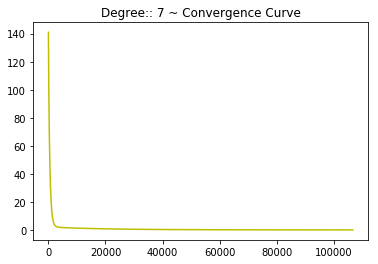



Degree ::8...
Training...

Iteration #100 - 109.46956900831483
Iteration #200 - 87.72327656801606
Iteration #300 - 71.19577338634718
Iteration #400 - 58.097560714195296
Iteration #500 - 47.56380604046209
Iteration #600 - 39.049701289656916
Iteration #700 - 32.15561268591756
Iteration #800 - 26.56912399507118
Iteration #900 - 22.040336249050483
Iteration #1000 - 18.367784369686987
Iteration #1100 - 15.388614767148882
Iteration #1200 - 12.971059111598176
Iteration #1300 - 11.008459019971003
Iteration #1400 - 9.414463266455053
Iteration #1500 - 8.119151237368266
Iteration #1600 - 7.065899435546507
Iteration #1700 - 6.20884720290308
Iteration #1800 - 5.510846545027105
Iteration #1900 - 4.941803318504257
Iteration #2000 - 4.477334900861843
Iteration #2100 - 4.097683833852607
Iteration #2200 - 3.7868385269141003
Iteration #2300 - 3.5318214741057177
Iteration #2400 - 3.3221130063665165
Iteration #2500 - 3.1491847179198977
Iteration #2600 - 3.006121650163492
Iteration #2700 - 2.8873163136336

Iteration #22500 - 0.944960685484034
Iteration #22600 - 0.9413954365926176
Iteration #22700 - 0.9378533249328118
Iteration #22800 - 0.9343341938554183
Iteration #22900 - 0.930837887784886
Iteration #23000 - 0.9273642522116259
Iteration #23100 - 0.9239131336843702
Iteration #23200 - 0.9204843798026177
Iteration #23300 - 0.917077839209164
Iteration #23400 - 0.913693361582663
Iteration #23500 - 0.9103307976302875
Iteration #23600 - 0.9069899990804223
Iteration #23700 - 0.9036708186754648
Iteration #23800 - 0.9003731101646348
Iteration #23900 - 0.8970967282968918
Iteration #24000 - 0.8938415288138855
Iteration #24100 - 0.8906073684429725
Iteration #24200 - 0.8873941048902912
Iteration #24300 - 0.8842015968339016
Iteration #24400 - 0.8810297039169683
Iteration #24500 - 0.8778782867410142
Iteration #24600 - 0.8747472068592105
Iteration #24700 - 0.8716363267697421
Iteration #24800 - 0.8685455099092012
Iteration #24900 - 0.8654746206460683
Iteration #25000 - 0.8624235242742069
Iteration #25100

Iteration #44200 - 0.5241026051341661
Iteration #44300 - 0.5231784653400435
Iteration #44400 - 0.5222596840213753
Iteration #44500 - 0.5213462255559556
Iteration #44600 - 0.5204380545633149
Iteration #44700 - 0.5195351359030599
Iteration #44800 - 0.5186374346732638
Iteration #44900 - 0.5177449162088253
Iteration #45000 - 0.516857546079861
Iteration #45100 - 0.5159752900901103
Iteration #45200 - 0.5150981142753338
Iteration #45300 - 0.5142259849017484
Iteration #45400 - 0.5133588684644439
Iteration #45500 - 0.5124967316858392
Iteration #45600 - 0.5116395415141264
Iteration #45700 - 0.510787265121736
Iteration #45800 - 0.5099398699038101
Iteration #45900 - 0.5090973234766953
Iteration #46000 - 0.5082595936764194
Iteration #46100 - 0.5074266485572125
Iteration #46200 - 0.5065984563900172
Iteration #46300 - 0.5057749856610094
Iteration #46400 - 0.5049562050701384
Iteration #46500 - 0.5041420835296705
Iteration #46600 - 0.50333259016274
Iteration #46700 - 0.5025276943019273
Iteration #46800

Iteration #66000 - 0.40568717924729963
Iteration #66100 - 0.40538481741816434
Iteration #66200 - 0.4050837504729684
Iteration #66300 - 0.404783970296295
Iteration #66400 - 0.40448546882731856
Iteration #66500 - 0.4041882380594287
Iteration #66600 - 0.40389227003986267
Iteration #66700 - 0.40359755686933374
Iteration #66800 - 0.4033040907016756
Iteration #66900 - 0.4030118637434785
Iteration #67000 - 0.4027208682537271
Iteration #67100 - 0.40243109654345155
Iteration #67200 - 0.40214254097536595
Iteration #67300 - 0.4018551939635219
Iteration #67400 - 0.4015690479729582
Iteration #67500 - 0.4012840955193578
Iteration #67600 - 0.40100032916869305
Iteration #67700 - 0.40071774153689743
Iteration #67800 - 0.40043632528951445
Iteration #67900 - 0.4001560731413732
Iteration #68000 - 0.39987697785623905
Iteration #68100 - 0.3995990322464883
Iteration #68200 - 0.3993222291727798
Iteration #68300 - 0.3990465615437243
Iteration #68400 - 0.398772022315558
Iteration #68500 - 0.39849860449182073
It

Iteration #87600 - 0.3607038817580315
Iteration #87700 - 0.36055803818291843
Iteration #87800 - 0.36041256067610533
Iteration #87900 - 0.3602674473152103
Iteration #88000 - 0.3601226961903979
Iteration #88100 - 0.3599783054042822
Iteration #88200 - 0.3598342730718612
Iteration #88300 - 0.3596905973204131
Iteration #88400 - 0.3595472762894292
Iteration #88500 - 0.3594043081305194
Iteration #88600 - 0.35926169100733996
Iteration #88700 - 0.3591194230955022
Iteration #88800 - 0.35897750258250116
Iteration #88900 - 0.3588359276676293
Iteration #89000 - 0.35869469656189734
Iteration #89100 - 0.3585538074879582
Iteration #89200 - 0.35841325868002377
Iteration #89300 - 0.358273048383788
Iteration #89400 - 0.358133174856356
Iteration #89500 - 0.3579936363661534
Iteration #89600 - 0.35785443119286076
Iteration #89700 - 0.3577155576273362
Iteration #89800 - 0.3575770139715335
Iteration #89900 - 0.35743879853843374
Iteration #90000 - 0.35730090965196865
Iteration #90100 - 0.3571633456469437
Itera

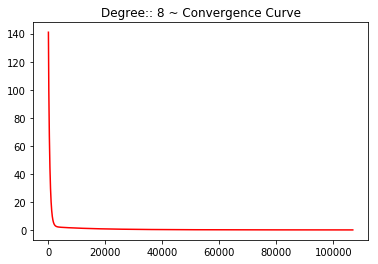



Degree ::9...
Training...

Iteration #100 - 108.85694862758433
Iteration #200 - 87.3486141844901
Iteration #300 - 70.99196487849852
Iteration #400 - 57.97786548298869
Iteration #500 - 47.487288225035854
Iteration #600 - 38.999221409934826
Iteration #700 - 32.12327779291073
Iteration #800 - 26.55046097453525
Iteration #900 - 22.032267604943577
Iteration #1000 - 18.36794536511001
Iteration #1100 - 15.395104578244112
Iteration #1200 - 12.982328945285111
Iteration #1300 - 11.023245575340818
Iteration #1400 - 9.431739978206387
Iteration #1500 - 8.138088844262073
Iteration #1600 - 7.085832970528463
Iteration #1700 - 6.229248111143041
Iteration #1800 - 5.531299126946223
Iteration #1900 - 4.961984874453929
Iteration #2000 - 4.496999047562179
Iteration #2100 - 4.116646530859816
Iteration #2200 - 3.8049664099387153
Iteration #2300 - 3.5490221446249306
Iteration #2400 - 3.3383269744018724
Iteration #2500 - 3.1643787372574974
Iteration #2600 - 3.020283222848337
Iteration #2700 - 2.90044917353726

Iteration #22400 - 0.9559635967970079
Iteration #22500 - 0.9524040082661767
Iteration #22600 - 0.9488673300547346
Iteration #22700 - 0.9453534058882274
Iteration #22800 - 0.9418620805754865
Iteration #22900 - 0.9383932000008928
Iteration #23000 - 0.9349466111166832
Iteration #23100 - 0.9315221619353393
Iteration #23200 - 0.9281197015220505
Iteration #23300 - 0.9247390799872078
Iteration #23400 - 0.921380148479009
Iteration #23500 - 0.9180427591760765
Iteration #23600 - 0.9147267652801762
Iteration #23700 - 0.9114320210089677
Iteration #23800 - 0.908158381588836
Iteration #23900 - 0.9049057032477592
Iteration #24000 - 0.9016738432082547
Iteration #24100 - 0.8984626596803658
Iteration #24200 - 0.8952720118547105
Iteration #24300 - 0.8921017598955863
Iteration #24400 - 0.8889517649341322
Iteration #24500 - 0.8858218890615257
Iteration #24600 - 0.8827119953222575
Iteration #24700 - 0.8796219477074441
Iteration #24800 - 0.8765516111481825
Iteration #24900 - 0.8735008515089895
Iteration #250

Iteration #44500 - 0.5284110151072607
Iteration #44600 - 0.5274816100462965
Iteration #44700 - 0.526557367977307
Iteration #44800 - 0.5256382549466659
Iteration #44900 - 0.5247242372332368
Iteration #45000 - 0.5238152813467778
Iteration #45100 - 0.5229113540263467
Iteration #45200 - 0.522012422238696
Iteration #45300 - 0.5211184531767293
Iteration #45400 - 0.5202294142579149
Iteration #45500 - 0.5193452731227426
Iteration #45600 - 0.5184659976331836
Iteration #45700 - 0.5175915558711601
Iteration #45800 - 0.5167219161370245
Iteration #45900 - 0.5158570469480407
Iteration #46000 - 0.5149969170369073
Iteration #46100 - 0.5141414953502437
Iteration #46200 - 0.5132907510471307
Iteration #46300 - 0.512444653497635
Iteration #46400 - 0.5116031722813488
Iteration #46500 - 0.5107662771859476
Iteration #46600 - 0.5099339382057498
Iteration #46700 - 0.5091061255402869
Iteration #46800 - 0.5082828095928924
Iteration #46900 - 0.5074639609692851
Iteration #47000 - 0.5066495504761759
Iteration #4710

Iteration #66000 - 0.4073361533231946
Iteration #66100 - 0.407008857072099
Iteration #66200 - 0.40668288590272966
Iteration #66300 - 0.4063582319460183
Iteration #66400 - 0.40603488738542365
Iteration #66500 - 0.40571284445657607
Iteration #66600 - 0.4053920954469078
Iteration #66700 - 0.40507263269530897
Iteration #66800 - 0.40475444859176224
Iteration #66900 - 0.4044375355770029
Iteration #67000 - 0.4041218861421648
Iteration #67100 - 0.40380749282843553
Iteration #67200 - 0.403494348226708
Iteration #67300 - 0.403182444977244
Iteration #67400 - 0.4028717757693386
Iteration #67500 - 0.402562333340972
Iteration #67600 - 0.4022541104784897
Iteration #67700 - 0.40194710001625644
Iteration #67800 - 0.40164129483633265
Iteration #67900 - 0.40133668786815124
Iteration #68000 - 0.40103327208818595
Iteration #68100 - 0.40073104051963016
Iteration #68200 - 0.40042998623207693
Iteration #68300 - 0.4001301023411976
Iteration #68400 - 0.3998313820084352
Iteration #68500 - 0.3995338184406714
Iter

Iteration #87400 - 0.35825209258215596
Iteration #87500 - 0.3580900884844305
Iteration #87600 - 0.35792850403861287
Iteration #87700 - 0.35776733728452725
Iteration #87800 - 0.35760658627414876
Iteration #87900 - 0.3574462490715054
Iteration #88000 - 0.3572863237526065
Iteration #88100 - 0.3571268084053616
Iteration #88200 - 0.3569677011294936
Iteration #88300 - 0.35680900003646976
Iteration #88400 - 0.3566507032494087
Iteration #88500 - 0.3564928089030133
Iteration #88600 - 0.35633531514349415
Iteration #88700 - 0.3561782201284756
Iteration #88800 - 0.3560215220269394
Iteration #88900 - 0.3558652190191345
Iteration #89000 - 0.3557093092965028
Iteration #89100 - 0.35555379106161233
Iteration #89200 - 0.3553986625280726
Iteration #89300 - 0.35524392192046317
Iteration #89400 - 0.3550895674742609
Iteration #89500 - 0.35493559743576764
Iteration #89600 - 0.3547820100620365
Iteration #89700 - 0.35462880362079696
Iteration #89800 - 0.3544759763903867
Iteration #89900 - 0.3543235266596738
It

Iteration #108700 - 0.33089053755091147
Iteration #108800 - 0.3307876903437474
Iteration #108900 - 0.33068502545507217
Iteration #109000 - 0.3305825423073191
Iteration #109100 - 0.3304802403258843
Iteration #109200 - 0.33037811893910907
Iteration #109300 - 0.3302761775782539
Iteration #109400 - 0.3301744156774946
Iteration #109500 - 0.3300728326738897
Iteration #109600 - 0.32997142800736745
Iteration #109700 - 0.3298702011207095
Iteration #109800 - 0.32976915145952823
Iteration #109900 - 0.32966827847225477
Iteration #110000 - 0.32956758161011146
Iteration #110100 - 0.3294670603271062
Iteration #110200 - 0.32936671408000506
Iteration #110300 - 0.32926654232831853
Iteration #110349 - 0.3292175217065013
Iteration #110350 - 0.32921652172009963
Converged!!


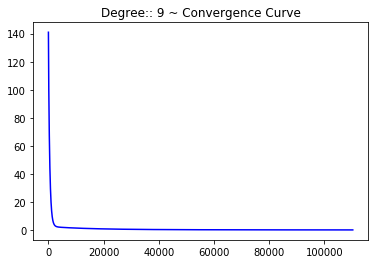

In [219]:
# Estimating the best polynomial fit
Jval_degree = []
Jtrain_degree = []
colors = [None,'c','b','r','g','m','k','y','r','b']

for i in d[1:]:
    print('\n\nDegree ::{}...\nTraining...\n'.format(i))
    Theta, Jhist = batchGradDescent(X[:,:i+1], y,0)
    
    plt.figure();
    plt.plot(Jhist,color = colors[i])
    plt.title("Degree:: {} ~ Convergence Curve".format(i))

    plt.show()
    
    Jval_degree.append( costFunction_Reg(Xval[:,:i+1],yval,Theta,0)[0] )
    Jtrain_degree.append( costFunction_Reg(X[:,:i+1],y,Theta,0)[0] )

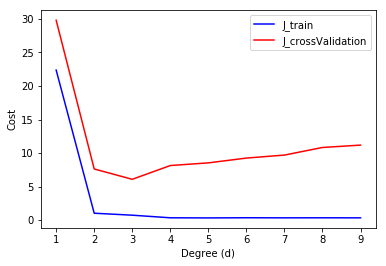

Degree for min error on Training set:: 5
Degree for min error on Cross Validation set:: 3


In [220]:
plt.plot(d[1:], Jtrain_degree,color = 'b',label = 'J_train')
plt.plot(d[1:],Jval_degree,color = 'r', label = 'J_crossValidation')

plt.legend(loc = 'best')
plt.xlabel('Degree (d)')
plt.ylabel('Cost')

plt.show()
print("Degree for min error on Training set::", Jtrain_degree.index(min(Jtrain_degree)) + 1)
print("Degree for min error on Cross Validation set::", Jval_degree.index(min(Jval_degree)) + 1)


In [241]:
Degree = Jval_degree.index(min(Jval_degree)) + 1;
X = X[:,:Degree+1]
Xval = Xval[:,:Degree+1]
Xtest = Xtest[:,:Degree+1]


## Estimating best value for Lambda(Regularization factor)



Lambda ::0...
Training...

Iteration #100 - 113.55103924493973
Iteration #200 - 92.37276028876428
Iteration #300 - 75.91310163454496
Iteration #400 - 62.92240634887225
Iteration #500 - 52.53072977272524
Iteration #600 - 44.121885563157726
Iteration #700 - 37.25134372281897
Iteration #800 - 31.592330983651355
Iteration #900 - 26.90013747093211
Iteration #1000 - 22.988232524140393
Iteration #1100 - 19.712085749592234
Iteration #1200 - 16.958052354659863
Iteration #1300 - 14.635616596949628
Iteration #1400 - 12.671885667182103
Iteration #1500 - 11.00761047576312
Iteration #1600 - 9.594257186791777
Iteration #1700 - 8.39181328898036
Iteration #1800 - 7.367115937553853
Iteration #1900 - 6.492558279104415
Iteration #2000 - 5.745074271676085
Iteration #2100 - 5.1053323131126636
Iteration #2200 - 4.557088032953567
Iteration #2300 - 4.086660255102034
Iteration #2400 - 3.6825035723622834
Iteration #2500 - 3.3348575968989147
Iteration #2600 - 3.03545767927856
Iteration #2700 - 2.777295324076419

Iteration #22300 - 0.7613990706062733
Iteration #22400 - 0.760872413240064
Iteration #22500 - 0.7603519150059501
Iteration #22600 - 0.7598375038743441
Iteration #22700 - 0.759329108658028
Iteration #22800 - 0.7588266590023031
Iteration #22900 - 0.758330085375254
Iteration #23000 - 0.7578393190581233
Iteration #23100 - 0.7573542921358071
Iteration #23200 - 0.756874937487445
Iteration #23300 - 0.7564011887771511
Iteration #23400 - 0.7559329804448118
Iteration #23500 - 0.7554702476970327
Iteration #23600 - 0.755012926498155
Iteration #23700 - 0.7545609535614078
Iteration #23800 - 0.7541142663401397
Iteration #23900 - 0.7536728030191743
Iteration #24000 - 0.7532365025062392
Iteration #24100 - 0.7528053044235309
Iteration #24200 - 0.7523791490993427
Iteration #24300 - 0.7519579775598235
Iteration #24400 - 0.7515417315207961
Iteration #24500 - 0.7511303533797129
Iteration #24600 - 0.7507237862076683
Iteration #24700 - 0.7503219737415296
Iteration #24800 - 0.7499248603761451
Iteration #24900 

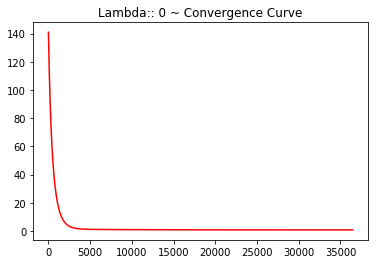



Lambda ::0.01...
Training...

Iteration #100 - 113.55228970767354
Iteration #200 - 92.37689443112738
Iteration #300 - 75.92085298476823
Iteration #400 - 62.93404247520301
Iteration #500 - 52.54628345340403
Iteration #600 - 44.14127497405543
Iteration #700 - 37.274433136070044
Iteration #800 - 31.618960408542442
Iteration #900 - 26.930136628020517
Iteration #1000 - 23.021427273194725
Iteration #1100 - 19.748301109962544
Iteration #1200 - 16.99711412567265
Iteration #1300 - 14.677352480678909
Iteration #1400 - 12.716126247858998
Iteration #1500 - 11.05419015660937
Iteration #1600 - 9.643015081599515
Iteration #1700 - 8.442594034448755
Iteration #1800 - 7.419770392574941
Iteration #1900 - 6.546944088570813
Iteration #2000 - 5.801056285530522
Iteration #2100 - 5.162782862440569
Iteration #2200 - 4.61588707283659
Iteration #2300 - 4.146695388825354
Iteration #2400 - 3.7436699739777555
Iteration #2500 - 3.3970578497515493
Iteration #2600 - 3.0986015474983915
Iteration #2700 - 2.84129947269

Iteration #22300 - 0.8390567193333711
Iteration #22400 - 0.8385493190429512
Iteration #22500 - 0.8380479362534407
Iteration #22600 - 0.8375524996004275
Iteration #22700 - 0.8370629385658501
Iteration #22800 - 0.8365791834679538
Iteration #22900 - 0.8361011654513754
Iteration #23000 - 0.8356288164773382
Iteration #23100 - 0.8351620693139732
Iteration #23200 - 0.8347008575267427
Iteration #23300 - 0.8342451154689945
Iteration #23400 - 0.8337947782726055
Iteration #23500 - 0.8333497818387573
Iteration #23600 - 0.832910062828809
Iteration #23700 - 0.8324755586552861
Iteration #23800 - 0.8320462074729671
Iteration #23900 - 0.8316219481700804
Iteration #24000 - 0.8312027203596112
Iteration #24100 - 0.8307884643707014
Iteration #24200 - 0.8303791212401573
Iteration #24300 - 0.8299746327040631
Iteration #24400 - 0.8295749411894755
Iteration #24500 - 0.8291799898062415
Iteration #24600 - 0.8287897223388911
Iteration #24700 - 0.8284040832386429
Iteration #24800 - 0.8280230176154952
Iteration #24

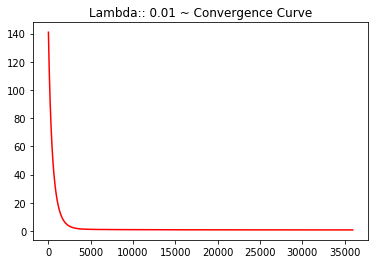



Lambda ::0.03...
Training...

Iteration #100 - 113.55479023547355
Iteration #200 - 92.38516013286463
Iteration #300 - 75.93634858911008
Iteration #400 - 62.95730085699405
Iteration #500 - 52.57736816057372
Iteration #600 - 44.18002062865485
Iteration #700 - 37.32056680816209
Iteration #800 - 31.672160868599548
Iteration #900 - 26.99006227255317
Iteration #1000 - 23.087728965666123
Iteration #1100 - 19.82062821148237
Iteration #1200 - 17.07511772770526
Iteration #1300 - 14.760687642360368
Iteration #1400 - 12.804453945315682
Iteration #1500 - 11.14717914548143
Iteration #1600 - 9.740343667543225
Iteration #1700 - 8.543951684031347
Iteration #1800 - 7.524859117439988
Iteration #1900 - 6.655479558508112
Iteration #2000 - 5.912768652318373
Iteration #2100 - 5.277417298405172
Iteration #2200 - 4.7332040438163
Iteration #2300 - 4.266470690893706
Iteration #2400 - 3.865694568025267
Iteration #2500 - 3.5211375291793012
Iteration #2600 - 3.224556473020274
Iteration #2700 - 2.9689636055211532


Iteration #22600 - 0.9921458402423976
Iteration #22700 - 0.9916918802471422
Iteration #22800 - 0.99124345348849
Iteration #22900 - 0.9908004925228134
Iteration #23000 - 0.9903629307285409
Iteration #23100 - 0.9899307022961421
Iteration #23200 - 0.9895037422182251
Iteration #23300 - 0.9890819862797652
Iteration #23400 - 0.9886653710484385
Iteration #23500 - 0.9882538338650941
Iteration #23600 - 0.9878473128343136
Iteration #23700 - 0.9874457468151195
Iteration #23800 - 0.9870490754117652
Iteration #23900 - 0.9866572389646598
Iteration #24000 - 0.986270178541391
Iteration #24100 - 0.9858878359278639
Iteration #24200 - 0.9855101536195446
Iteration #24300 - 0.9851370748128137
Iteration #24400 - 0.984768543396418
Iteration #24500 - 0.9844045039430356
Iteration #24600 - 0.9840449017009381
Iteration #24700 - 0.983689682585758
Iteration #24800 - 0.9833387931723492
Iteration #24900 - 0.9829921806867592
Iteration #25000 - 0.9826497929982829
Iteration #25100 - 0.982311578611629
Iteration #25200 -

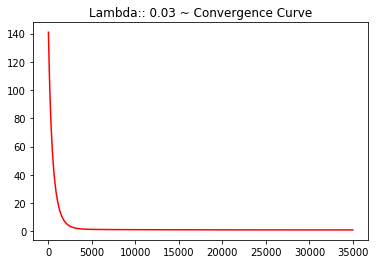



Lambda ::0.1...
Training...

Iteration #100 - 113.56353790893337
Iteration #200 - 92.41406298916819
Iteration #300 - 75.99050878321493
Iteration #400 - 63.03855977560514
Iteration #500 - 52.6859272233861
Iteration #600 - 44.315282957264145
Iteration #700 - 37.481561785226525
Iteration #800 - 31.857751209558703
Iteration #900 - 27.199041525093627
Iteration #1000 - 23.318866293042852
Iteration #1100 - 20.07268939178241
Iteration #1200 - 17.34687638089433
Iteration #1300 - 15.05093297216196
Iteration #1400 - 13.111997459993155
Iteration #1500 - 11.470861057951838
Iteration #1600 - 10.079038957915964
Iteration #1700 - 8.896575592154427
Iteration #1800 - 7.890371835682746
Iteration #1900 - 7.032889974597748
Iteration #2000 - 6.301137083216208
Iteration #2100 - 5.675857232574153
Iteration #2200 - 5.140882963382231
Iteration #2300 - 4.682610078156124
Iteration #2400 - 4.289569216633777
Iteration #2500 - 3.9520742837189076
Iteration #2600 - 3.661932515886431
Iteration #2700 - 3.4122044000937

Iteration #22600 - 1.5247779015425482
Iteration #22700 - 1.524429359822383
Iteration #22800 - 1.5240854678816524
Iteration #22900 - 1.5237461636891885
Iteration #23000 - 1.5234113860413607
Iteration #23100 - 1.523081074551034
Iteration #23200 - 1.5227551696366848
Iteration #23300 - 1.5224336125116382
Iteration #23400 - 1.5221163451734818
Iteration #23500 - 1.5218033103935897
Iteration #23600 - 1.521494451706805
Iteration #23700 - 1.5211897134012524
Iteration #23800 - 1.5208890405082944
Iteration #23900 - 1.5205923787926094
Iteration #24000 - 1.5202996747424118
Iteration #24100 - 1.5200108755598003
Iteration #24200 - 1.5197259291512282
Iteration #24300 - 1.5194447841181191
Iteration #24400 - 1.519167389747583
Iteration #24500 - 1.5188936960032726
Iteration #24600 - 1.518623653516364
Iteration #24700 - 1.5183572135766432
Iteration #24800 - 1.5180943281237238
Iteration #24900 - 1.5178349497383752
Iteration #25000 - 1.517579031633976
Iteration #25100 - 1.5173265276480619
Iteration #25200 -

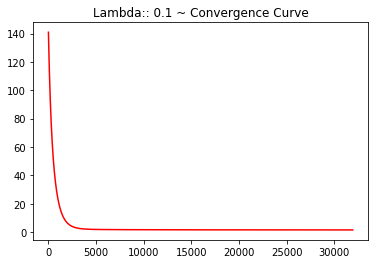



Lambda ::0.3...
Training...

Iteration #100 - 113.58849552737497
Iteration #200 - 92.49641083086337
Iteration #300 - 76.14461648118973
Iteration #400 - 63.26948728569254
Iteration #500 - 52.99407231033199
Iteration #600 - 44.69878810596918
Iteration #700 - 37.937524988885194
Iteration #800 - 32.38281485204306
Iteration #900 - 27.78966882118776
Iteration #1000 - 23.971467802907853
Iteration #1100 - 20.783682025891007
Iteration #1200 - 18.112714665002347
Iteration #1300 - 15.868130348784314
Iteration #1400 - 13.977144567636577
Iteration #1500 - 12.380642958488151
Iteration #1600 - 11.030251276475177
Iteration #1700 - 9.886138940996375
Iteration #1800 - 8.915343909257656
Iteration #1900 - 8.09047492949335
Iteration #2000 - 7.388692071370408
Iteration #2100 - 6.790896166469111
Iteration #2200 - 6.281077738510921
Iteration #2300 - 5.84578956473941
Iteration #2400 - 5.4737163715460255
Iteration #2500 - 5.155321738296423
Iteration #2600 - 4.8825569775322295
Iteration #2700 - 4.6486201745910

Iteration #22400 - 2.981735670097998
Iteration #22500 - 2.981566268047839
Iteration #22600 - 2.981399682188983
Iteration #22700 - 2.9812358657042086
Iteration #22800 - 2.9810747725545945
Iteration #22900 - 2.9809163574665822
Iteration #23000 - 2.980760575919261
Iteration #23100 - 2.980607384131847
Iteration #23200 - 2.9804567390513776
Iteration #23300 - 2.9803085983406237
Iteration #23400 - 2.9801629203661766
Iteration #23500 - 2.9800196641867593
Iteration #23600 - 2.9798787895417114
Iteration #23700 - 2.979740256839677
Iteration #23800 - 2.979604027147484
Iteration #23900 - 2.9794700621791956
Iteration #24000 - 2.97933832428535
Iteration #24100 - 2.9792087764423836
Iteration #24200 - 2.979081382242221
Iteration #24300 - 2.978956105882051
Iteration #24400 - 2.9788329121542523
Iteration #24500 - 2.9787117664365135
Iteration #24600 - 2.9785926346820917
Iteration #24700 - 2.978475483410242
Iteration #24800 - 2.9783602796968243
Iteration #24900 - 2.9782469911650313
Iteration #25000 - 2.978

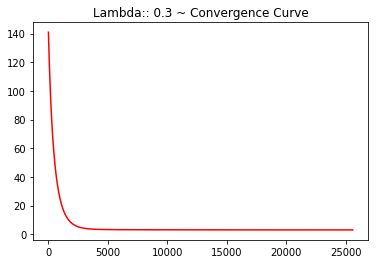



Lambda ::1...
Training...

Iteration #100 - 113.67543190501422
Iteration #200 - 92.78194533909175
Iteration #300 - 76.67666108194064
Iteration #400 - 64.06347335769956
Iteration #500 - 54.049404793850414
Iteration #600 - 46.00728947653326
Iteration #700 - 39.48764295267951
Iteration #800 - 34.16164821605538
Iteration #900 - 29.78390745846055
Iteration #1000 - 26.167816106680405
Iteration #1100 - 23.16905137396631
Iteration #1200 - 20.67432105154196
Iteration #1300 - 18.593557307833812
Iteration #1400 - 16.854394605925524
Iteration #1500 - 15.39818408666498
Iteration #1600 - 14.177058684582164
Iteration #1700 - 13.151730027772338
Iteration #1800 - 12.289805004553703
Iteration #1900 - 11.564478817261868
Iteration #2000 - 10.953506236725001
Iteration #2100 - 10.43838233226977
Iteration #2200 - 10.00368367594503
Iteration #2300 - 9.636534382099251
Iteration #2400 - 9.326170552742317
Iteration #2500 - 9.063583165429895
Iteration #2600 - 8.841224070213894
Iteration #2700 - 8.65276314300871

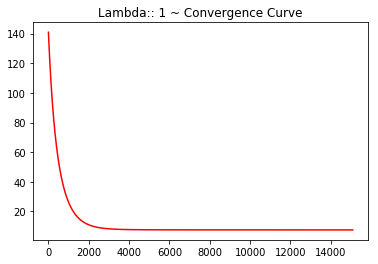



Lambda ::1.5...
Training...

Iteration #100 - 113.73713601341888
Iteration #200 - 92.98337168381707
Iteration #300 - 77.04982403815448
Iteration #400 - 64.61731670561146
Iteration #500 - 54.78172504343228
Iteration #600 - 46.91077876142413
Iteration #700 - 40.55286038152506
Iteration #800 - 35.378429089577764
Iteration #900 - 31.142004733484054
Iteration #1000 - 27.657181053936885
Iteration #1100 - 24.779954498445665
Iteration #1200 - 22.397407693300046
Iteration #1300 - 20.419878973940307
Iteration #1400 - 18.77543168003605
Iteration #1500 - 17.405864383562804
Iteration #1600 - 16.26377205832311
Iteration #1700 - 15.310338123471146
Iteration #1800 - 14.513645382113362
Iteration #1900 - 13.847363184973421
Iteration #2000 - 13.289713036469045
Iteration #2100 - 12.822644285963696
Iteration #2200 - 12.431171116236143
Iteration #2300 - 12.10283527392593
Iteration #2400 - 11.827268102512146
Iteration #2500 - 11.59583184514818
Iteration #2600 - 11.401324781906395
Iteration #2700 - 11.23773

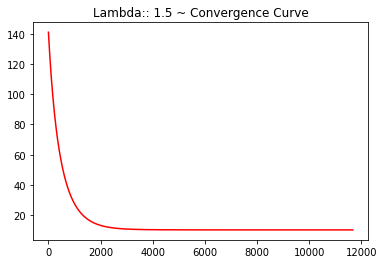



Lambda ::2...
Training...

Iteration #100 - 113.79851458820956
Iteration #200 - 93.1827205918704
Iteration #300 - 77.41737646649437
Iteration #400 - 65.16037346640016
Iteration #500 - 55.49671072101046
Iteration #600 - 47.78928653667107
Iteration #700 - 41.58458929552573
Iteration #800 - 36.552557438160676
Iteration #900 - 32.44780300044176
Iteration #1000 - 29.084271199565592
Iteration #1100 - 26.318414189202898
Iteration #1200 - 24.037811566539773
Iteration #1300 - 22.15331648763754
Iteration #1400 - 20.593516478017094
Iteration #1500 - 19.300739474767365
Iteration #1600 - 18.228111158359482
Iteration #1700 - 17.337342518076387
Iteration #1800 - 16.59703582736534
Iteration #1900 - 15.981366824795916
Iteration #2000 - 15.469045752459602
Iteration #2100 - 15.042489189354892
Iteration #2200 - 14.687154039702804
Iteration #2300 - 14.390998151735003
Iteration #2400 - 14.144041078452995
Iteration #2500 - 13.938004851689069
Iteration #2600 - 13.766019216094742
Iteration #2700 - 13.6223791

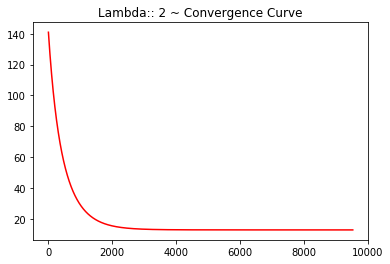



Lambda ::3...
Training...

Iteration #100 - 113.92030290444619
Iteration #200 - 93.57528423959201
Iteration #300 - 78.13604030966506
Iteration #400 - 66.21510972829833
Iteration #500 - 56.876615708107735
Iteration #600 - 49.47464849158237
Iteration #700 - 43.55264084431024
Iteration #800 - 38.78010029549842
Iteration #900 - 34.912336557126324
Iteration #1000 - 31.76443704833541
Iteration #1100 - 29.19414595461066
Iteration #1200 - 27.09036731491505
Iteration #1300 - 25.365268485827563
Iteration #1400 - 23.94872613105984
Iteration #1500 - 22.78432553540684
Iteration #1600 - 21.826412211823587
Iteration #1700 - 21.03787307193887
Iteration #1800 - 20.388435646984867
Iteration #1900 - 19.853343935804403
Iteration #2000 - 19.412314198781445
Iteration #2100 - 19.04870302781982
Iteration #2200 - 18.748839183513972
Iteration #2300 - 18.501483613741968
Iteration #2400 - 18.297390985199023
Iteration #2500 - 18.128952360813482
Iteration #2600 - 17.989903215595792
Iteration #2700 - 17.8750843577

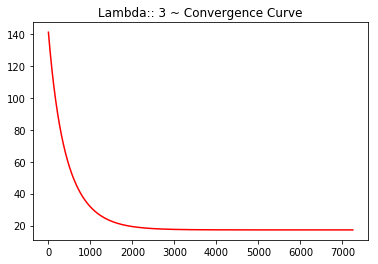



Lambda ::4...
Training...

Iteration #100 - 114.04081226516347
Iteration #200 - 93.95982945110919
Iteration #300 - 78.83341538318349
Iteration #400 - 67.22958637943537
Iteration #500 - 58.1928467376788
Iteration #600 - 51.069660164797234
Iteration #700 - 45.40139031583569
Iteration #800 - 40.85791473886067
Iteration #900 - 37.19589475488603
Iteration #1000 - 34.23210132883342
Iteration #1100 - 31.826022722394192
Iteration #1200 - 29.868264173477762
Iteration #1300 - 28.27261704344558
Iteration #1400 - 26.970495620702412
Iteration #1500 - 25.906934512470105
Iteration #1600 - 25.037639434180612
Iteration #1700 - 24.326767298405095
Iteration #1800 - 23.745224358272615
Iteration #1900 - 23.26934156675744
Iteration #2000 - 22.87983090570213
Iteration #2100 - 22.560955201225013
Iteration #2200 - 22.299862893205955
Iteration #2300 - 22.086052013119673
Iteration #2400 - 21.910936473146307
Iteration #2500 - 21.76749405236841
Iteration #2600 - 21.649980038809908
Iteration #2700 - 21.5536938909

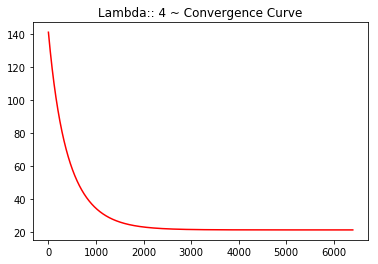

In [224]:
Lambda = [0,0.01,0.03,0.1,0.3,1,1.5,2,3,4]

Jval_Lambda = []
Jtrain_Lambda = []

for l in Lambda:
    print('\n\nLambda ::{}...\nTraining...\n'.format(l))
    Theta, Jhist = batchGradDescent(X, y, l)
    
    plt.figure();
    plt.plot(Jhist,color = 'r')
    plt.title("Lambda:: {} ~ Convergence Curve".format(l))

    plt.show()
    
    Jval_Lambda.append( costFunction_Reg(Xval,yval,Theta,0)[0] )
    Jtrain_Lambda.append( costFunction_Reg(X,y,Theta,0)[0] )

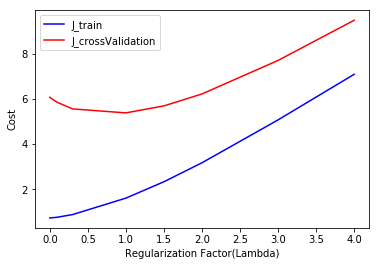

Lambda for min error on Training set:: 0
Lambda for min error on Cross Validation set:: 1


In [226]:
plt.plot(Lambda, Jtrain_Lambda,color = 'b',label = 'J_train')
plt.plot(Lambda,Jval_Lambda,color = 'r', label = 'J_crossValidation')

plt.legend(loc = 'best')
plt.xlabel('Regularization Factor(Lambda)')
plt.ylabel('Cost')

plt.show()
print("Lambda for min error on Training set::", Lambda[Jtrain_Lambda.index(min(Jtrain_Lambda))])
print("Lambda for min error on Cross Validation set::", Lambda[Jval_Lambda.index(min(Jval_Lambda))])
L =  Lambda[Jval_Lambda.index(min(Jval_Lambda))]

## Training our model::

In [266]:
Theta, Jhist = batchGradDescent(X,y,L+1)


Iteration #100 - 113.79851458820956
Iteration #200 - 93.1827205918704
Iteration #300 - 77.41737646649437
Iteration #400 - 65.16037346640016
Iteration #500 - 55.49671072101046
Iteration #600 - 47.78928653667107
Iteration #700 - 41.58458929552573
Iteration #800 - 36.552557438160676
Iteration #900 - 32.44780300044176
Iteration #1000 - 29.084271199565592
Iteration #1100 - 26.318414189202898
Iteration #1200 - 24.037811566539773
Iteration #1300 - 22.15331648763754
Iteration #1400 - 20.593516478017094
Iteration #1500 - 19.300739474767365
Iteration #1600 - 18.228111158359482
Iteration #1700 - 17.337342518076387
Iteration #1800 - 16.59703582736534
Iteration #1900 - 15.981366824795916
Iteration #2000 - 15.469045752459602
Iteration #2100 - 15.042489189354892
Iteration #2200 - 14.687154039702804
Iteration #2300 - 14.390998151735003
Iteration #2400 - 14.144041078452995
Iteration #2500 - 13.938004851689069
Iteration #2600 - 13.766019216094742
Iteration #2700 - 13.622379132536636
Iteration #2800 - 13

## Learning Curves

In [267]:


m = min(Xval.shape[0], X.shape[0])
Jtrain = []
Jval = []
for i in range(1,m+1):
    Jtrain.append( costFunction_Reg(X[:i+1,:],y[:i+1],Theta,0)[0] )
    Jval.append( costFunction_Reg(Xval[:i+1,:],yval[:i+1],Theta,0)[0] )



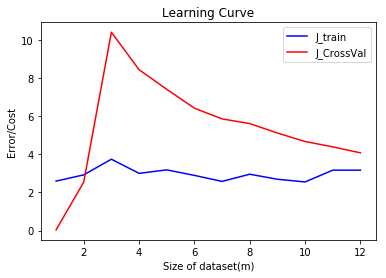

In [268]:
plt.plot(np.arange(1,m+1), Jtrain, color = 'b', label = 'J_train')
plt.plot(np.arange(1,m+1), Jval, color = 'r', label = 'J_CrossVal')

plt.xlabel('Size of dataset(m)')
plt.ylabel('Error/Cost')
plt.title('Learning Curve')
plt.legend(loc = 'best')

plt.show()

## Accuracy Score

In [273]:
from sklearn.metrics import r2_score,explained_variance_score

prediction_error = costFunction_Reg(Xtest, ytest, Theta,0)[0]

predictions = Xtest@Theta

print('Prediction Error:: ', prediction_error)

print('varience score:: ', explained_variance_score(ytest, predictions)*100)
print('R2 score:: ', r2_score(ytest, predictions)*100)


Prediction Error::  11.327907188832606
varience score::  91.22525078588754
R2 score::  88.75008807029967


# End

``@Nikhil_Chigali``